In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
%matplotlib inline

In [3]:
from time import time
from pandas import DataFrame
import matplotlib
matplotlib.rcParams["font.size"] = 18

In [4]:
# row per List size, column per operation
# val is time in microseconds
df = DataFrame()

L = []
for N in range(5000):
    # it updates a len statistic
    # (a better list might also update sum, max)
    L.append(N) 
    
    t0 = time()
    x = sum(L)
    t1 = time()
    df.loc[N, "sum"] = (t1-t0) * 1e6
    
    t0 = time()
    x = len(L)
    t1 = time()
    df.loc[N, "len"] = (t1-t0) * 1e6
    
    t0 = time()
    x = max(L)
    t1 = time()
    df.loc[N, "max"] = (t1-t0) * 1e6 
    
    L2 = []
    t0 = time()
    L2.extend(L)
    t1 = time()
    df.loc[N, "extend"] = (t1-t0) * 1e6
    
df

,sum,len,max,extend
0,0.715256,0.953674,1.907349,1.192093
1,0.953674,1.192093,1.430511,0.476837
2,0.953674,0.715256,1.192093,0.715256
3,0.715256,1.192093,1.430511,0.715256
4,0.715256,0.953674,1.192093,0.953674
...,...,...,...,...
4995,25.272369,0.953674,84.400177,10.251999
4996,25.272369,1.192093,84.400177,10.251999
4997,25.510788,0.953674,84.400177,9.536743
4998,25.510788,0.953674,84.638596,9.775162


Text(0, 0.5, 'Time (Microseconds)')

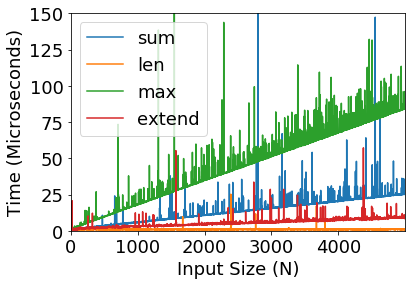

In [5]:
ax = df.plot.line()
ax.set_ylim(0, 150)
ax.set_xlabel("Input Size (N)")
ax.set_ylabel("Time (Microseconds)")